<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento

### Presentado por Angela Cristina Villate 
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
!pip install vaderSentiment

In [2]:
!pip install textblob

In [3]:
!pip install googletrans

In [4]:
!pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [5]:
!pip install flair

Cargamos los datos y los traducimos a inglés para proceder al análisis

In [7]:
from googletrans import Translator
import pandas as pd
 
data = pd.read_csv("datos121120.csv")
data = data.sample(50)
data.head()

,tweet,date,city,user_location,place,coordinates,id,link
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...


In [11]:
import re 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [12]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]"
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus]
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ..."
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[]
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]"


In [10]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

In [13]:
data['preproces'] = data['clean'].apply(lambda texto: pre_procesado(texto))
data


,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...
138,Acá no banco a Metro. Fue penal la acción de L...,2020-11-10 16:11:10,Bogotá,Caracas-Venezuela,NaN,NaN,1326195706625974276,https://twitter.com/i/web/status/1326195706625...,Acá no banco a Metro. Fue penal la acción de L...,[https://t.co/97JMPqvTwQ],[],[],acá banco metro penal acción luis gonzález igu...
239,#InnovaciónEnLaJusticia ⚖ @ivandgomezlee pres...,2020-11-09 14:49:42,Bogotá,"Bogotá, D.C., Colombia",NaN,NaN,1325812817824538626,https://twitter.com/i/web/status/1325812817824...,⚖ presenta el informe “El estado del arbitr...,[https://t.co/UCxZ2d5rTA],[#InnovaciónEnLaJusticia],[@ivandgomezlee],presenta informe arbitraje nacional colombia p...
61,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,2020-11-11 11:59:35,Bogotá,"Cumaná, estado Sucre.",NaN,NaN,1326494779950182401,https://twitter.com/i/web/status/1326494779950...,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,[],[],[],nociones derecho marítimo arbitraje refiere me...
139,@javidavilam flaco y Rómulo no se olviden de h...,2020-11-10 16:08:13,Bogotá,Guayaquil.,NaN,NaN,1326194965307777024,https://twitter.com/i/web/status/1326194965307...,flaco y Rómulo no se olviden de hacerle acuer...,[],[],[@javidavilam],flaco rómulo olviden hacerle acuerdo sr muente...
91,Malo el arbitraje. No saca amarillas para Inde...,2020-11-11 00:45:28,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326325133322162176,https://twitter.com/i/web/status/1326325133322...,Malo el arbitraje. No saca amarillas para Inde...,[],[],[],malo arbitraje saca amarillas independiente pr...


Al no salvar la data con la función clean y de preprocesado, se tuvo que repetir ese paso en este punto. La traducción la hice sobre clean para no perder los emojisni los signos de exclamación.

In [14]:
translator = Translator()
data['ing'] = data['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces,ing
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...,"Translated(src=es, dest=en, text=And Marquitos..."
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...,"Translated(src=es, dest=en, text=Inconsistenci..."
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...,"Translated(src=es, dest=en, text=What would I ..."
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...,"Translated(src=es, dest=en, text=What a mall o..."
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...,"Translated(src=es, dest=en, text=NOW THOSE WHO..."


In [15]:
data['traducción'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces,ing,traducción
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...,"Translated(src=es, dest=en, text=And Marquitos...",And Marquitos Caicedo will let himself continu...
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...,"Translated(src=es, dest=en, text=Inconsistenci...",Inconsistencies of our abysmal arbitration ..\...
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...,"Translated(src=es, dest=en, text=What would I ...",What would I say they said that it was the bes...
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...,"Translated(src=es, dest=en, text=What a mall o...",What a mall of Congo arbitration. Galo Corozo ...
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...,"Translated(src=es, dest=en, text=NOW THOSE WHO...",NOW THOSE WHO WON THANKS TO THE VAR LAST SEASO...


Una vez traducidos los textos, procesamos los datos con las librerías

## Análisis con VaderSentiment 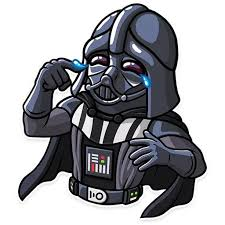 

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
vader = SentimentIntensityAnalyzer()


In [18]:
data['sentimiento'] = data['traducción'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces,ing,traducción,sentimiento
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...,"Translated(src=es, dest=en, text=And Marquitos...",And Marquitos Caicedo will let himself continu...,0.4939
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...,"Translated(src=es, dest=en, text=Inconsistenci...",Inconsistencies of our abysmal arbitration ..\...,0.0000
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...,"Translated(src=es, dest=en, text=What would I ...",What would I say they said that it was the bes...,0.7650
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...,"Translated(src=es, dest=en, text=What a mall o...",What a mall of Congo arbitration. Galo Corozo ...,-0.2263
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...,"Translated(src=es, dest=en, text=NOW THOSE WHO...",NOW THOSE WHO WON THANKS TO THE VAR LAST SEASO...,0.8658


No olvidar... con la siguiente línea traigo solo las columnas que necesito para visualizar mejor el análisis y además organizo el puntaje de los sentimientos

In [53]:
data2=data[['tweet', 'clean', 'traducción', 'sentimiento']].sort_values('sentimiento')
data2

,tweet,clean,traducción,sentimiento
168,"Que desastre es el arbitraje del Futve, en el ...","Que desastre es el arbitraje del Futve, en el ...","What a disaster is the arbitration of Futve, i...",-0.8852
91,Malo el arbitraje. No saca amarillas para Inde...,Malo el arbitraje. No saca amarillas para Inde...,Bad arbitration. He does not get yellow for In...,-0.8295
176,Esta Liga FUTVE es un robo!!! Que asco de arbi...,Esta Liga FUTVE es un robo!!! Que asco de arbi...,This FUTVE League is a steal !!! How disgustin...,-0.8164
114,Metropolitanos manifiestan inconformidad y den...,Metropolitanos manifiestan inconformidad y den...,Metropolitans express disagreement and denounc...,-0.7906
301,@NachitoTV Ahora es culpa del arbitraje tenías...,Ahora es culpa del arbitraje tenías que ser u...,Now it's the referee's fault you had to be a s...,-0.7717
298,@DiegoJMontero2 @LolaMartos10 Son hechos tan e...,"Son hechos tan evidentes, lo demencial del a...","They are so obvious facts, the insaneness of r...",-0.5859
116,@MillonariosEste Muy mal el arbitraje.,Muy mal el arbitraje.,Very bad arbitration.,-0.5849
76,Qué arbitraje de mierda,Qué arbitraje de mierda,What shit arbitrage,-0.5574
175,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,The bad refereeing is incredible💆🏻‍♂️🤦🏻‍♂️,-0.5423
88,Termina 1T @BarcelonaSC 1-0 @IDV_EC mal arbitr...,Termina 1T 1-0 mal arbitraje muy cargado y p...,Ends 1T 1-0 bad refereeing very loaded and pro...,-0.5423


### Análisis de sentimiento con Flair  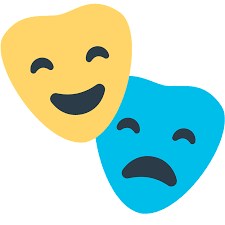

In [147]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
classifier = TextClassifier.load('sentiment')

2020-11-18 06:27:53,657 loading file C:\Users\villa\.flair\models\sentiment-en-mix-distillbert_3.1.pt
2020-11-18 06:27:57,535 loading file C:\Users\villa\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [150]:
classifier = TextClassifier.load('sentiment')
 
def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score
 
data['sent_flair'] = data['tweet'].apply(lambda valor: sent_flair(valor))
data.head()

2020-11-18 06:28:59,408 loading file C:\Users\villa\.flair\models\sentiment-en-mix-distillbert_3.1.pt


,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces,ing,traducción,sentimiento,emojis,sent_flair
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...,"Translated(src=es, dest=en, text=And Marquitos...",And Marquitos Caicedo will let himself continu...,0.4939,[],0.996086
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...,"Translated(src=es, dest=en, text=Inconsistenci...",Inconsistencies of our abysmal arbitration ..\...,0.0000,[],-0.999738
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...,"Translated(src=es, dest=en, text=What would I ...",What would I say they said that it was the bes...,0.7650,[],-0.695580
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...,"Translated(src=es, dest=en, text=What a mall o...",What a mall of Congo arbitration. Galo Corozo ...,-0.2263,[],-0.999783
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...,"Translated(src=es, dest=en, text=NOW THOSE WHO...",NOW THOSE WHO WON THANKS TO THE VAR LAST SEASO...,0.8658,[],-0.999968


In [153]:
data3=data[['tweet', 'sent_flair']].sort_values('sent_flair')
data3

,tweet,sent_flair
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,-0.999968
91,Malo el arbitraje. No saca amarillas para Inde...,-0.999895
86,Arbitraje malo no a insidado en el resultado t...,-0.999844
100,Que arbitraje de Congo tan mall. Galo Corozo s...,-0.999783
85,@pelusabus Incoherencias de nuestro arbitraje ...,-0.999738
383,El arbitraje fue terrible!!!\nNo generaba segu...,-0.999420
77,El arbitraje en Colombia es terrible,-0.998900
220,@SevillaFC_Fem El segundo gol del Sevilla en c...,-0.996249
175,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,-0.996116
192,@lpf_true No sr. Mis comentarios son contra el...,-0.996053


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

### Sentimiento más positivo con Vader 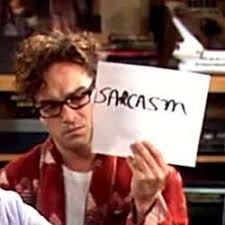

In [29]:
data2.loc[192]['tweet']

'@lpf_true No sr. Mis comentarios son contra el arbitraje, mas no ando llorando jugadas como él todos los fines de semana. Pero tranquilos que la cartita a santa les va a salir cara 🤭🤭🤭🤭'

Intentamos con el anterior y el contexto es más comprensible

In [30]:
data2.loc[352]['tweet']

'Pues nada que objetar, realmente lo del arbitraje no puede criticarse, el VAR es una herramienta que intenta ser lo más objetiva posible, solo queda destacar el nivel que tiene y que espero haga crecer Valverde, el mejor del madrid esta temporada.'

### Sentimiento más positivo con flair

In [154]:
data3.loc[150]['tweet']

'Arbitraje para el partido entre @LDU_Oficial  y @ClubMushucRuna1  \nÁrbitros:\nGuillermo Guerrero (Central)\nJuan Aguiar (Asistente 1)\nPaúl Palacios (Asistente 2)\nJefferson Macías (4to Árbitro)\nJorge Kaslin (Comisario de Juego)'

### En realidad esta clasificación no me arroja ninguna señal sobre sentimientos 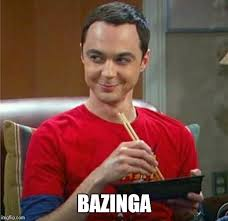

In [155]:
data3.loc[49]['tweet']

'¡Manzur testificó ante 14 directivos por la Corrupción en el Arbitraje!  (ENTREVISTA) Esteban Paz confirma que Carlos Manzur brindó explicaciones a varios dirigentes sobre las “misteriosas llamadas” y las “presiones” https://t.co/V5TVlt9UQ3 https://t.co/X9RVAf8mX1'

### Sentimiento más negativo con flair

In [32]:
data2.loc[168]['tweet']

'Que desastre es el arbitraje del Futve, en el torneo de barinas creo q hay el peor arbitraje de vzla!!!!'

## Selección de sentimientos en positivos, negativos y neutros:

El filtro de los datos se hizo por rangos, según la clasificación Vader. Entenderé que son positivos aquellos cuya puntuación en Vader haya sido superior o iguales  a 0.5. Los nuetros estarán en 0. Los negativos serán inferiores a 0.

In [42]:
import pandas as pd

## Sentimientos positivo

In [54]:
df_1=data2[data2.sentimiento >=0.5]
df_1


,tweet,clean,traducción,sentimiento
61,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,NOTIONS ON MARITIME LAW. Arbitration refers to...,0.5859
210,De Lunes a Viernes a las 08h00 y 16h00 Voces D...,De Lunes a Viernes a las 08h00 y 16h00 Voces D...,From Monday to Friday at 8:00 a.m. and 4:00 p....,0.5994
68,@SantaFe En medio de todo me estaba gustando e...,En medio de todo me estaba gustando el arbitr...,In the middle of everything I was enjoying the...,0.6103
208,@miguelloor @9deOctubrefc Para cuando el gran ...,Para cuando el gran cambio de la ? Denuncia...,For when the big change of the? Complaints to ...,0.6239
80,"Totalmente de acuerdo, la herramienta está per...","Totalmente de acuerdo, la herramienta está per...","Totally agree, the tool is but not even right ...",0.6953
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,Que dira que dijeron q era el mejor arbitr...,What would I say they said that it was the bes...,0.7650
205,#InnovaciónEnLaJusticia | El arbitraje es part...,| El arbitraje es parte esencial de la cultur...,| Arbitration is an essential part of the nati...,0.7783
121,Me da risa esa gente que dice que el arbitraje...,Me da risa esa gente que dice que el arbitraje...,I laugh at those people who say that arbitrati...,0.8122
0,@renacova De los muchos campeonatos no robados...,De los muchos campeonatos no robados por en ...,Of the many championships not stolen by in the...,0.8190
139,@javidavilam flaco y Rómulo no se olviden de h...,flaco y Rómulo no se olviden de hacerle acuer...,Skinny and Rómulo do not forget to make an agr...,0.8286


## Sentimientos negativos

In [55]:
df_2=data2[data2.sentimiento <=0]
df_2

,tweet,clean,traducción,sentimiento
168,"Que desastre es el arbitraje del Futve, en el ...","Que desastre es el arbitraje del Futve, en el ...","What a disaster is the arbitration of Futve, i...",-0.8852
91,Malo el arbitraje. No saca amarillas para Inde...,Malo el arbitraje. No saca amarillas para Inde...,Bad arbitration. He does not get yellow for In...,-0.8295
176,Esta Liga FUTVE es un robo!!! Que asco de arbi...,Esta Liga FUTVE es un robo!!! Que asco de arbi...,This FUTVE League is a steal !!! How disgustin...,-0.8164
114,Metropolitanos manifiestan inconformidad y den...,Metropolitanos manifiestan inconformidad y den...,Metropolitans express disagreement and denounc...,-0.7906
301,@NachitoTV Ahora es culpa del arbitraje tenías...,Ahora es culpa del arbitraje tenías que ser u...,Now it's the referee's fault you had to be a s...,-0.7717
298,@DiegoJMontero2 @LolaMartos10 Son hechos tan e...,"Son hechos tan evidentes, lo demencial del a...","They are so obvious facts, the insaneness of r...",-0.5859
116,@MillonariosEste Muy mal el arbitraje.,Muy mal el arbitraje.,Very bad arbitration.,-0.5849
76,Qué arbitraje de mierda,Qué arbitraje de mierda,What shit arbitrage,-0.5574
175,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,The bad refereeing is incredible💆🏻‍♂️🤦🏻‍♂️,-0.5423
88,Termina 1T @BarcelonaSC 1-0 @IDV_EC mal arbitr...,Termina 1T 1-0 mal arbitraje muy cargado y p...,Ends 1T 1-0 bad refereeing very loaded and pro...,-0.5423


In [56]:
df_3=data2[data2.sentimiento ==0]
df_3

,tweet,clean,traducción,sentimiento
150,Arbitraje para el partido entre @LDU_Oficial ...,Arbitraje para el partido entre y \nÁrbitr...,Arbitration for the match between and\nReferee...,0.0
48,¡Manzur testificó ante 14 directivos por la Co...,¡Manzur testificó ante 14 directivos por la Co...,Manzur testified before 14 executives for Corr...,0.0
85,@pelusabus Incoherencias de nuestro arbitraje ...,Incoherencias de nuestro arbitraje paupérrimo...,Inconsistencies of our abysmal arbitration ..\...,0.0
33,La idea es que los asociados ejerzan el derech...,La idea es que los asociados ejerzan el derech...,The idea is that the associates exercise the r...,0.0
23,Es que la FEF sigue manejando la comisión de a...,Es que la FEF sigue manejando la comisión de a...,The fact is that the FEF continues to manage t...,0.0
377,Menudo arbitraje le están haciendo al Real Madrid,Menudo arbitraje le están haciendo al Real Madrid,What arbitration they are doing to Real Madrid,0.0


###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [142]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [136]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data2['emojis'] = data2['clean'].apply(lambda text: get_emojis(text))

In [138]:
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,preproces,ing,traducción,sentimiento,emojis
308,@nelsandino10 @ZonaLibreDeHumo @AsoDeporCali Y...,2020-11-08 23:24:38,Bogotá,Cali,NaN,NaN,1325580017385033728,https://twitter.com/i/web/status/1325580017385...,Y Marquitos Caicedo se dejara seguir metien...,[],[],"[@nelsandino10, @ZonaLibreDeHumo, @AsoDeporCali]",marquitos caicedo dejara seguir metiendo mano ...,"Translated(src=es, dest=en, text=And Marquitos...",And Marquitos Caicedo will let himself continu...,0.4939,[]
85,@pelusabus Incoherencias de nuestro arbitraje ...,2020-11-11 00:56:12,Bogotá,"Guayaquil, Ecuador",NaN,NaN,1326327836647575553,https://twitter.com/i/web/status/1326327836647...,Incoherencias de nuestro arbitraje paupérrimo...,[],[],[@pelusabus],incoherencias arbitraje paupérrimo internacion...,"Translated(src=es, dest=en, text=Inconsistenci...",Inconsistencies of our abysmal arbitration ..\...,0.0000,[]
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,2020-11-10 23:49:15,Bogotá,tachira- Venezuela,NaN,NaN,1326310985678860288,https://twitter.com/i/web/status/1326310985678...,Que dira que dijeron q era el mejor arbitr...,[],[],"[@JLSanchez78, @jotajordi13, @cristobalsoria, ...",dira dijeron q mejor arbitraje jaja cada dia d...,"Translated(src=es, dest=en, text=What would I ...",What would I say they said that it was the bes...,0.7650,[]
100,Que arbitraje de Congo tan mall. Galo Corozo s...,2020-11-10 23:45:10,Bogotá,Manta-Ecuador,Place(_api=<tweepy.api.API object at 0x0000020...,NaN,1326309957495615489,https://twitter.com/i/web/status/1326309957495...,Que arbitraje de Congo tan mall. Galo Corozo s...,[],[],[],arbitraje congo tan mall galo corozo cayó vece...,"Translated(src=es, dest=en, text=What a mall o...",What a mall of Congo arbitration. Galo Corozo ...,-0.2263,[]
325,@NachitoTV AHORA SE VIENEN A QUEJAR DEL ARBITR...,2020-11-08 22:16:25,Bogotá,Dominican Republic,NaN,NaN,1325562847720509441,https://twitter.com/i/web/status/1325562847720...,AHORA SE VIENEN A QUEJAR DEL ARBITRAJE LOS QU...,[],[],"[@NachitoTV, @NachitoTV]",ahora vienen quejar arbitraje temporada pasada...,"Translated(src=es, dest=en, text=NOW THOSE WHO...",NOW THOSE WHO WON THANKS TO THE VAR LAST SEASO...,0.8658,[]


In [140]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
7,🤭,4
1,🛑,2
0,⚖,1
10,🏳️,1
16,😏,1


In [143]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Nubes de palabras por sentimiento

In [51]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

In [57]:
df_1['preproces'] = df_1['clean'].apply(lambda texto: pre_procesado(texto))
df_1

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,clean,traducción,sentimiento,preproces
61,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,NOCIONES SOBRE DERECHO MARÍTIMO. El arbitraje ...,NOTIONS ON MARITIME LAW. Arbitration refers to...,0.5859,nociones derecho marítimo arbitraje refiere me...
210,De Lunes a Viernes a las 08h00 y 16h00 Voces D...,De Lunes a Viernes a las 08h00 y 16h00 Voces D...,From Monday to Friday at 8:00 a.m. and 4:00 p....,0.5994,lunes viernes h h voces deportivas live inform...
68,@SantaFe En medio de todo me estaba gustando e...,En medio de todo me estaba gustando el arbitr...,In the middle of everything I was enjoying the...,0.6103,medio gustando arbitraje
208,@miguelloor @9deOctubrefc Para cuando el gran ...,Para cuando el gran cambio de la ? Denuncia...,For when the big change of the? Complaints to ...,0.6239,gran cambio denuncias arbitraje dirigentes cor...
80,"Totalmente de acuerdo, la herramienta está per...","Totalmente de acuerdo, la herramienta está per...","Totally agree, the tool is but not even right ...",0.6953,totalmente acuerdo herramienta así aciertan bu...
99,@JLSanchez78 Que dira @jotajordi13 @cristobals...,Que dira que dijeron q era el mejor arbitr...,What would I say they said that it was the bes...,0.7650,dira dijeron q mejor arbitraje jaja cada dia d...
205,#InnovaciónEnLaJusticia | El arbitraje es part...,| El arbitraje es parte esencial de la cultur...,| Arbitration is an essential part of the nati...,0.7783,arbitraje parte esencial cultura jurídica naci...
121,Me da risa esa gente que dice que el arbitraje...,Me da risa esa gente que dice que el arbitraje...,I laugh at those people who say that arbitrati...,0.8122,da risa gente dice arbitraje siempre favorece ...
0,@renacova De los muchos campeonatos no robados...,De los muchos campeonatos no robados por en ...,Of the many championships not stolen by in the...,0.8190,campeonatos robados finales cabañas jugador ac...
139,@javidavilam flaco y Rómulo no se olviden de h...,flaco y Rómulo no se olviden de hacerle acuer...,Skinny and Rómulo do not forget to make an agr...,0.8286,flaco rómulo olviden hacerle acuerdo sr muente...


In [103]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import numpy as np

## Sentimientos positivos 

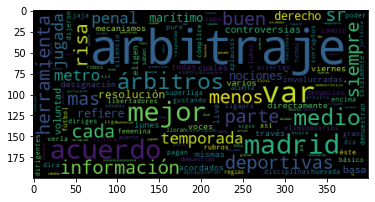

In [104]:
palabras = df_1.preproces.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

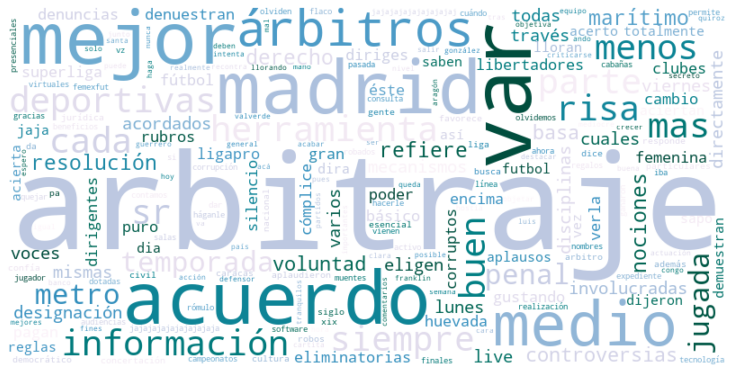

In [105]:
palabras = df_1.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='PuBuGn_r',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

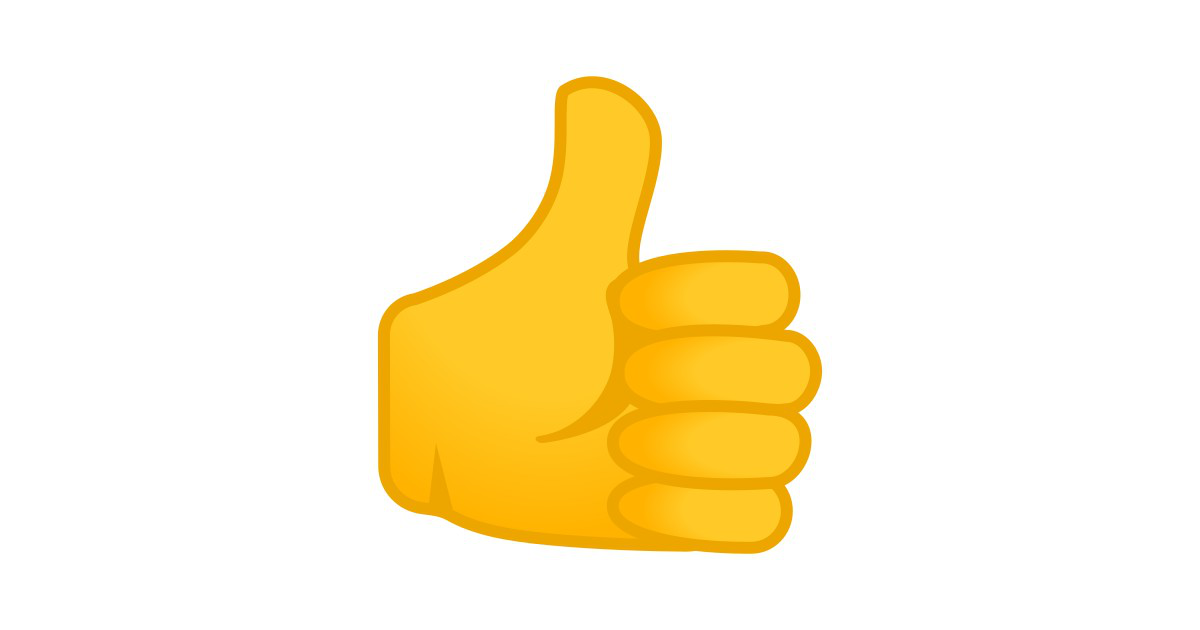

In [113]:
feliz= PIL.Image.open('arriba.jpg')
display(feliz)

In [114]:
mask = np.array(feliz)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

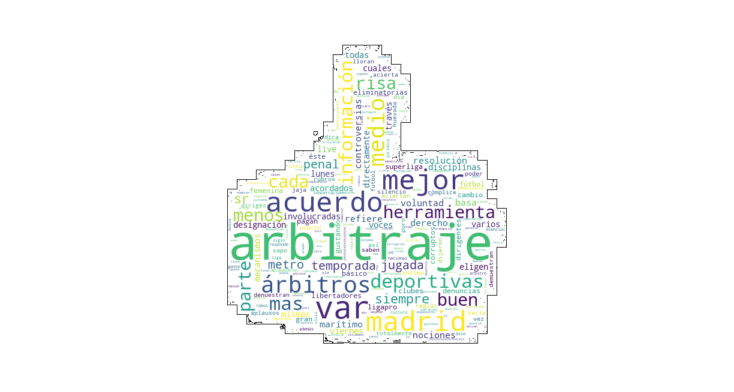

In [115]:
palabras = df_1.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='viridis',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("arriba.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Sentimientos negativos

In [117]:
df_2['preproces'] = df_2['clean'].apply(lambda texto: pre_procesado(texto))
df_2

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,clean,traducción,sentimiento,preproces
168,"Que desastre es el arbitraje del Futve, en el ...","Que desastre es el arbitraje del Futve, en el ...","What a disaster is the arbitration of Futve, i...",-0.8852,desastre arbitraje futve torneo barinas creo q...
91,Malo el arbitraje. No saca amarillas para Inde...,Malo el arbitraje. No saca amarillas para Inde...,Bad arbitration. He does not get yellow for In...,-0.8295,malo arbitraje saca amarillas independiente pr...
176,Esta Liga FUTVE es un robo!!! Que asco de arbi...,Esta Liga FUTVE es un robo!!! Que asco de arbi...,This FUTVE League is a steal !!! How disgustin...,-0.8164,liga futve robo asco arbitraje
114,Metropolitanos manifiestan inconformidad y den...,Metropolitanos manifiestan inconformidad y den...,Metropolitans express disagreement and denounc...,-0.7906,metropolitanos manifiestan inconformidad denun...
301,@NachitoTV Ahora es culpa del arbitraje tenías...,Ahora es culpa del arbitraje tenías que ser u...,Now it's the referee's fault you had to be a s...,-0.7717,ahora culpa arbitraje ser madridista mierda ac...
298,@DiegoJMontero2 @LolaMartos10 Son hechos tan e...,"Son hechos tan evidentes, lo demencial del a...","They are so obvious facts, the insaneness of r...",-0.5859,hechos tan evidentes demencial arbitraje reite...
116,@MillonariosEste Muy mal el arbitraje.,Muy mal el arbitraje.,Very bad arbitration.,-0.5849,mal arbitraje
76,Qué arbitraje de mierda,Qué arbitraje de mierda,What shit arbitrage,-0.5574,arbitraje mierda
175,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,Es increíble el mal arbitraje💆🏻‍♂️🤦🏻‍♂️,The bad refereeing is incredible💆🏻‍♂️🤦🏻‍♂️,-0.5423,increíble mal arbitraje
88,Termina 1T @BarcelonaSC 1-0 @IDV_EC mal arbitr...,Termina 1T 1-0 mal arbitraje muy cargado y p...,Ends 1T 1-0 bad refereeing very loaded and pro...,-0.5423,termina t mal arbitraje cargado provocador


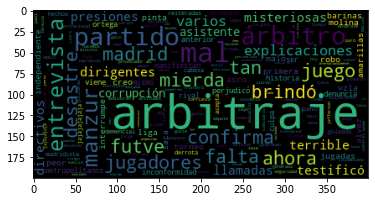

In [118]:
palabras = df_2.preproces.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

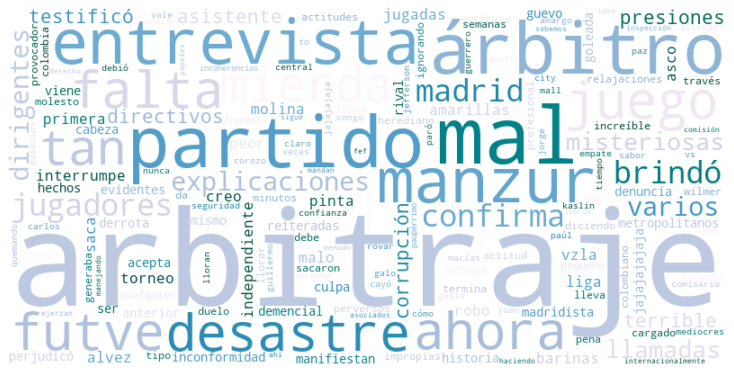

In [119]:
palabras = df_2.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='PuBuGn_r',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

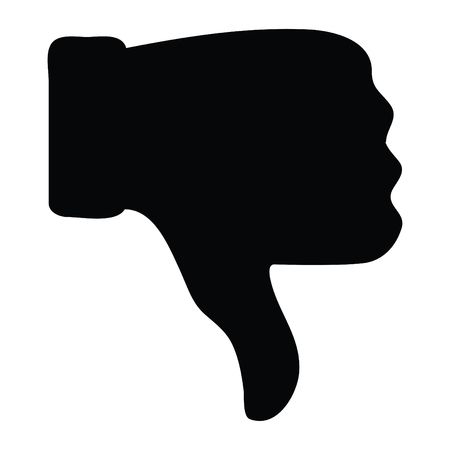

In [120]:
triste= PIL.Image.open('abajo.jpg')
display(triste)

In [123]:
mask = np.array(triste)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

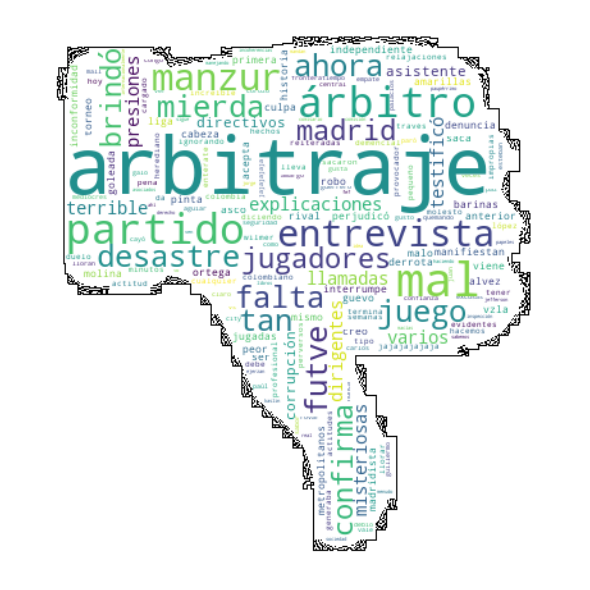

In [124]:
palabras = df_2.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='viridis',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("abajo.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Sentimientos neutros

In [127]:
df_3['preproces'] = df_3['clean'].apply(lambda texto: pre_procesado(texto))
df_3

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet,clean,traducción,sentimiento,preproces
150,Arbitraje para el partido entre @LDU_Oficial ...,Arbitraje para el partido entre y \nÁrbitr...,Arbitration for the match between and\nReferee...,0.0,arbitraje partido árbitros guillermo guerrero ...
48,¡Manzur testificó ante 14 directivos por la Co...,¡Manzur testificó ante 14 directivos por la Co...,Manzur testified before 14 executives for Corr...,0.0,manzur testificó directivos corrupción arbitra...
85,@pelusabus Incoherencias de nuestro arbitraje ...,Incoherencias de nuestro arbitraje paupérrimo...,Inconsistencies of our abysmal arbitration ..\...,0.0,incoherencias arbitraje paupérrimo internacion...
33,La idea es que los asociados ejerzan el derech...,La idea es que los asociados ejerzan el derech...,The idea is that the associates exercise the r...,0.0,idea asociados ejerzan derecho inspección libr...
23,Es que la FEF sigue manejando la comisión de a...,Es que la FEF sigue manejando la comisión de a...,The fact is that the FEF continues to manage t...,0.0,fef sigue manejando comisión arbitraje mandan ...
377,Menudo arbitraje le están haciendo al Real Madrid,Menudo arbitraje le están haciendo al Real Madrid,What arbitration they are doing to Real Madrid,0.0,menudo arbitraje haciendo real madrid


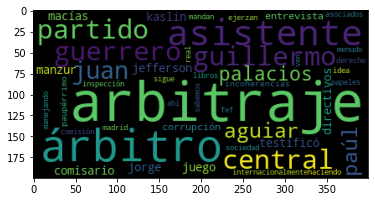

In [128]:
palabras = df_3.preproces.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

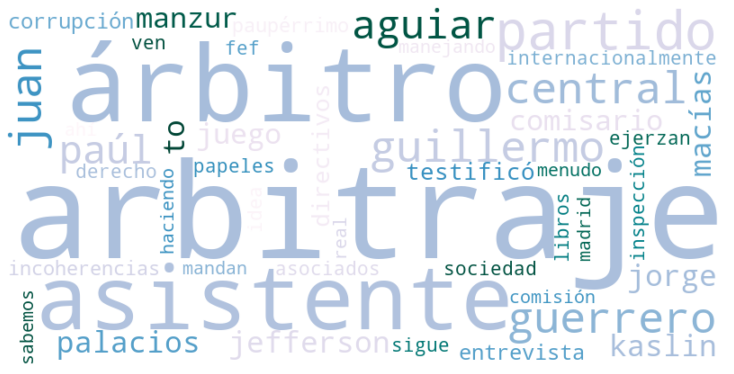

In [129]:
palabras = df_3.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='PuBuGn_r',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

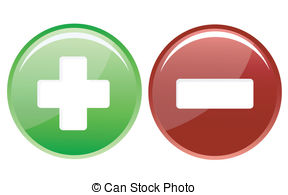

In [130]:
neutro= PIL.Image.open('posyneg.jpg')
display(neutro)

In [131]:
mask = np.array(neutro)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

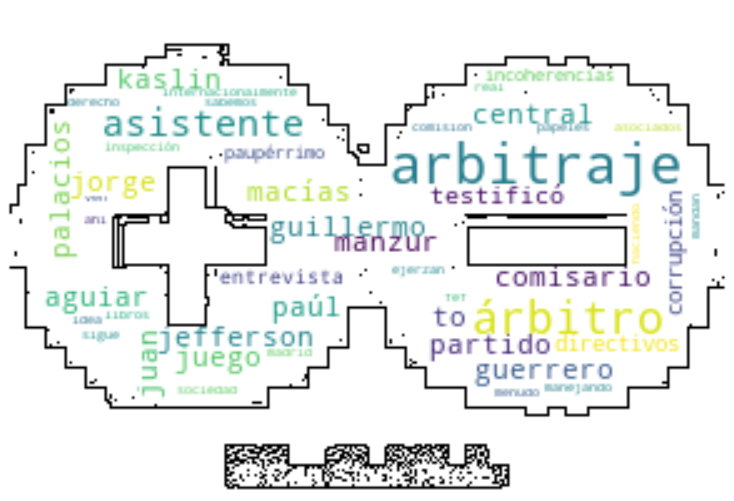

In [132]:
palabras = df_3.preproces.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='viridis',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("abajo.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()